# Team Members

    Amar (D22005)
    Sidhant Jain (D22046)
    Kenwin Dass (D22051)

# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Text Preprocessing
import nltk
import re, string
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder

# Text Visualization - Wordcloud
from wordcloud import WordCloud

# Vectorization using TF, TF-IDF and Doc2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors

# For the Progress Bar
from time import sleep
from tqdm import tqdm

# Dimensional Reduction
from sklearn.decomposition import PCA

# Train Test SPlit
from sklearn.model_selection import train_test_split

# Performance Measure
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
import xgboost

# Importing the Dataset

## 1. Reading the Data
    Reading the data in the Datframe with two columns named SMS and Labels.

In [ ]:
data = pd.read_csv("smsspamcollection/SMSSpamCollection", names=["Label", "SMS"], sep='\t')

In [ ]:
data.shape

(5572, 2)

## 2. Text Pre-Processing

In [ ]:
def preprocessing(data, duplicate = True):

    print(f"Preprocessing BEGAN.....\n")

    # Label Encoding the Target Column and making a new column for that
    print(f"-Encoding begins....")
    le = LabelEncoder()
    data["Label_encoded"] = le.fit_transform(data.Label)

#     data["encodeLabel"] = pd.get_dummies(data.Label)
    print(f"-Encoding ends...")

    # Checking for Duplicates because if there are any duplicates that will be cause noise and will give extra bias.
    if duplicate == True:
        print(f"-Checking for Duplicate data.....")
        if data.duplicated().sum() > 0:
            print(f"--There are {data.duplicated().sum()} duplicated values in the dataset.")
            print(f"--Dropping the Duplicate Values....")
            data.drop_duplicates(inplace = True)
            data = data.reset_index()
            data = data.drop("index", axis = 1)
            print(f"--Duplicate values were succesfully dropped.")
        else:
            print(f"There is no duplicate values in the dataset.")
        print(f"-Completetion of treating duplicate data.\n")

    # Converting Uppercase to Lower Case as this can cause model to give more preferance to
    # uppercase letter and we dont want that
    print(f"-Converting UPPER case to LOWER case characters....")
    data["SMS"] = data["SMS"].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(f"-Process Completed for converting UPPER case to LOWER case.\n")

    # Deleting the Punctuation Marks as they are noise for the model and doesnt provide any significance.
    print(f"-Removing the PUNCTUATION marks....")
    data["SMS"] = data["SMS"].str.replace('[^\w\s]','')
    print(f"-PUNCTUATION was succesfully deleted.\n")

    # Deleting the Stopwords as they are the most common words in english language and it would act as noise
    print(f"-Removing of Stopwords started....")
    stop_words = set(stopwords.words("english") + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    data["SMS"] = data["SMS"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
    print(f"-Removal of Stopwords is done.\n")

    # Doing Lemmatization which will hep us to get the Root word like caring will change to care.
    print(f"-LEMMATIZATION is started....")
    data["SMS"] = data["SMS"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    print(f"-LEMMATIZATION is finished.\n")

    # Removing the URLS as they are not helpfull
    print(f"-Removing of URLS is started....")
    data["SMS"] = data["SMS"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))
    print(f"-URLS are removed.")


    print(f"\nPreprocessing END.")
    return data

In [ ]:
data_with = data.copy()

In [ ]:
data = preprocessing(data, duplicate = True)
data

Preprocessing BEGAN.....

-Encoding begins....
-Encoding ends...
-Checking for Duplicate data.....
--There are 403 duplicated values in the dataset.
--Dropping the Duplicate Values....
--Duplicate values were succesfully dropped.
-Completetion of treating duplicate data.

-Converting UPPER case to LOWER case characters....
-Process Completed for converting UPPER case to LOWER case.

-Removing the PUNCTUATION marks....
-PUNCTUATION was succesfully deleted.

-Removing of Stopwords started....
-Removal of Stopwords is done.

-LEMMATIZATION is started....
-LEMMATIZATION is finished.

-Removing of URLS is started....
-URLS are removed.

Preprocessing END.


,Label,SMS,Label_encoded
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif oni,0
2,spam,free entry wkly comp win fa cup final tkts 21s...,1
3,ham,dun say early hor c already say,0
4,ham,nah think go usf life around though,0
...,...,...,...
5164,spam,2nd time tried contact 750 pound prize claim e...,1
5165,ham,b going esplanade fr home,0
5166,ham,pity mood soany suggestion,0
5167,ham,guy bitching acted like id interested buying s...,0


In [ ]:
data_with = preprocessing(data_with, duplicate = False)

Preprocessing BEGAN.....

-Encoding begins....
-Encoding ends...
-Converting UPPER case to LOWER case characters....
-Process Completed for converting UPPER case to LOWER case.

-Removing the PUNCTUATION marks....
-PUNCTUATION was succesfully deleted.

-Removing of Stopwords started....
-Removal of Stopwords is done.

-LEMMATIZATION is started....
-LEMMATIZATION is finished.

-Removing of URLS is started....
-URLS are removed.

Preprocessing END.


In [ ]:
data.shape

(5169, 3)

In [ ]:
data.drop_duplicates(inplace = True)
data = data.reset_index()
data = data.drop("index", axis = 1)

In [ ]:
data_with.shape

(5572, 3)

## 3. Data Exploration

    Visualization of the words using word cloud.
    1. We will make wordcloud for the whole dataset.
    2. Wordcloud for Spam.
    3. Wordcloud for Ham

<function matplotlib.pyplot.show(close=None, block=None)>

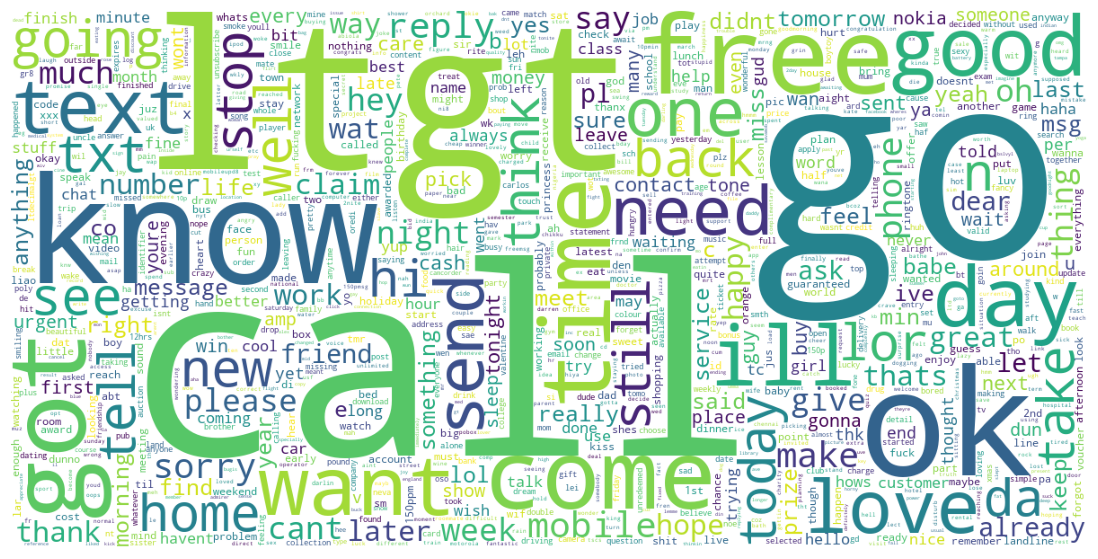

In [ ]:
# Wordcloud for Whole Dataset
sms = " ".join(i for i in data.SMS)
wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)
wc.generate(sms)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

In [ ]:
# Seperating the Words into Spam and Ham
spam = ''
ham = ''
for i in range(data.shape[0]):
    if data.Label[i] == "spam":
        spam = spam + data.SMS[i]

    else:
        ham = ham + data.SMS[i]

<function matplotlib.pyplot.show(close=None, block=None)>

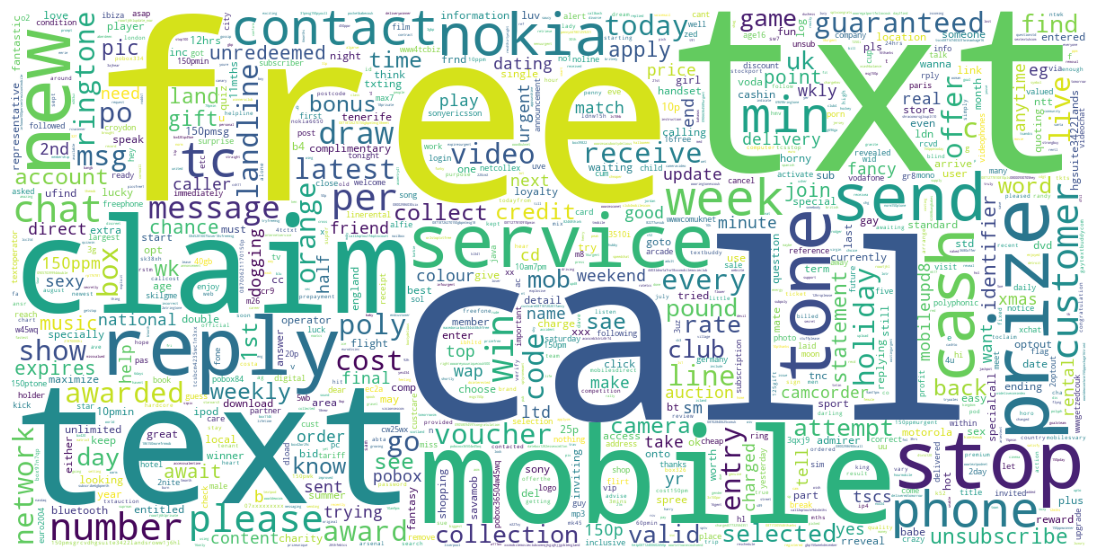

In [ ]:
# Wordcloud for Spam
wc.generate(spam)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

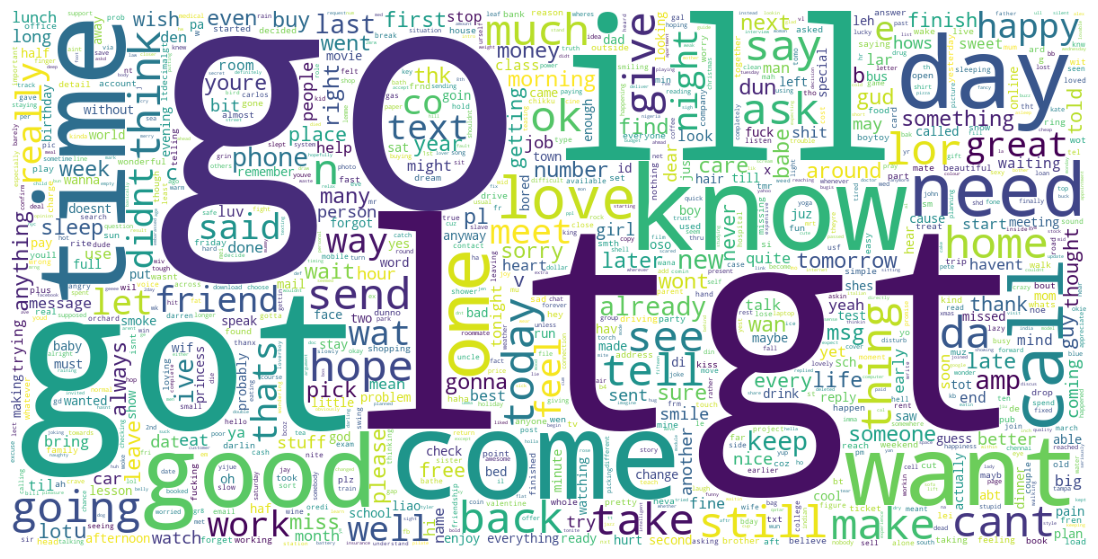

In [ ]:
# Wordcloud for Ham
wc.generate(ham)
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

## 4. Vectorization

### A. Vectorization using TF

In [ ]:
# Using count vectoroizer to create a document-term matrix
cv = CountVectorizer()
transform = cv.fit_transform(data.SMS)
names = cv.get_feature_names()

# Converting the document-term matrix to a dataframe
DTM_TF = pd.DataFrame(data=transform.toarray(), columns=names)
DTM_TF

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### B. Vectorization using TF-IDF

In [ ]:
tfidf_vec = TfidfVectorizer()
tfidf_vectors = tfidf_vec.fit_transform(data.SMS)

names = tfidf_vec.get_feature_names()

tfidf_vectors = tfidf_vectors.toarray()

tfidf_vectors = pd.DataFrame(tfidf_vectors, columns=names)
tfidf_vectors

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### C. Doc2Vec Model

In [ ]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin',
                                          binary=True)

In [ ]:
def embeddings(word):
    if word in model.key_to_index:
        return model.get_vector(word)
    else:
        return np.zeros(300)

In [ ]:
from collections import defaultdict
out_dict = defaultdict(list)

# out_dict = {}
i = 0
for sen in data_with.SMS:
    average_vector = (np.mean(np.array([embeddings(x) for x in nltk.word_tokenize(sen)]), axis=0))
    d1 = {sen: (average_vector)}
    out_dict.update(d1)

In [ ]:
document_matrix = pd.DataFrame(out_dict).T
document_matrix["SMS"] = document_matrix.index
document_matrix.reset_index(inplace = True)
document_matrix = document_matrix.drop('index',axis=1)

In [ ]:
doc2vec = pd.merge(document_matrix, data_with, on="SMS", how = "left")

In [ ]:
doc2vec.drop_duplicates(inplace = True)

## 5. Dimensional Reduction & Visualization

    We will do PCA for Dimensional Reduction and will keep the components that explain at least 95% of overall
    varaince.

In [ ]:
cleaned_data = data.copy()

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components=0.95)

# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(DTM_TF)

# save our two dimensions into x0 and x1
cleaned_data['tf_x0'] = pca_vecs[:, 0]
cleaned_data['tf_x1'] = pca_vecs[:, 1]

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components=0.95)

# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(tfidf_vectors)

# save our two dimensions into x0 and x1
cleaned_data['tfidf_x0'] = pca_vecs[:, 0]
cleaned_data['tfidf_x1'] = pca_vecs[:, 1]

In [ ]:
doc2vec = doc2vec.dropna()

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components=0.95)

temp = doc2vec.drop(["SMS", "Label", "Label_encoded"], axis=1)
pca_vecs = pca.fit_transform(temp)

### Visualization

<AxesSubplot:xlabel='tf_x0', ylabel='tf_x1'>

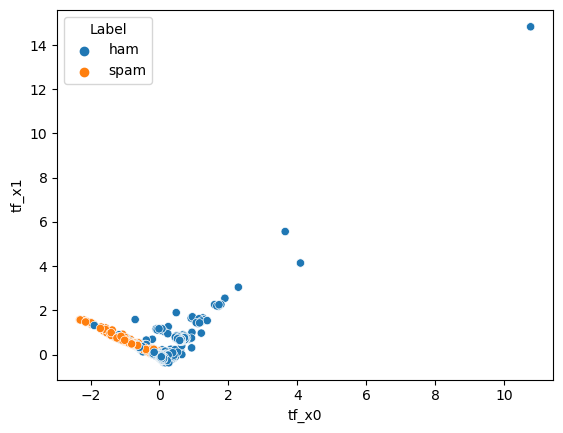

In [ ]:
# TF Vectors
sns.scatterplot(x = cleaned_data["tf_x0"], y = cleaned_data["tf_x1"], data = cleaned_data, hue = cleaned_data["Label"])

<AxesSubplot:xlabel='tfidf_x0', ylabel='tfidf_x1'>

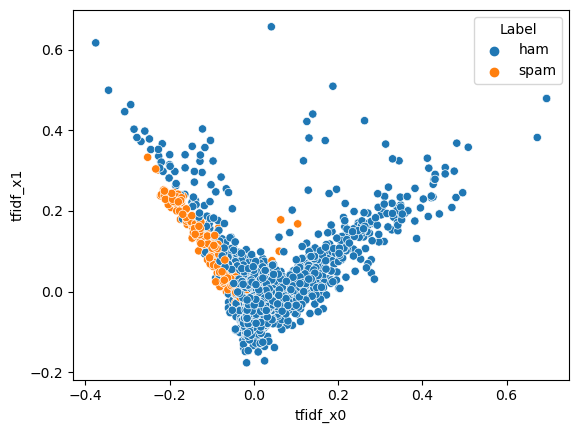

In [ ]:
# TF-IDF
sns.scatterplot(x = cleaned_data["tfidf_x0"], y = cleaned_data["tfidf_x1"], data = cleaned_data, hue = cleaned_data["Label"])

<AxesSubplot:>

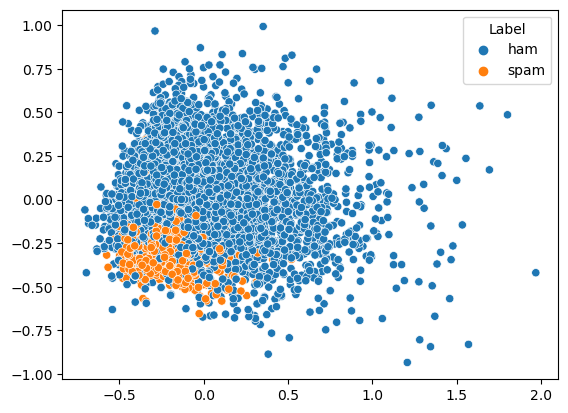

In [ ]:
# Doc2Vec Models
sns.scatterplot(x = pca_vecs[:, 0], y = pca_vecs[:, 1], data = temp, hue = doc2vec["Label"])

## 6. Spam Filters

    We will fit various models on our vectorized data.

In [ ]:
def results(model_number,model_name,y_true, y_pred, df_models):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    precise = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    df_models = df_models.append({"Model Number":model_number, "Model Name":model_name, "Valid F1":f1,
                                    "Valid Accuracy":accuracy, "Valid Precision":precise, "Valid Recall":recall},
                                ignore_index = True)
    return df_models

In [ ]:
# Parameter declaration for Grid Search CV

## Tuning Parameters for Logistic Regression
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'],
                'C' : [100, 10, 1.0, 0.1]}

## Tuning Parameters for Decision Tree Classifier
params_dtf = {'max_depth': [40, 50, 60, 70], 'min_samples_leaf': [5, 10, 20, 50],
              'criterion': ["gini", "entropy"]}

## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20],
              "min_samples_leaf" : [3,5,7,9], "n_estimators" : [50]}

## Tuning Parameters for Ada Boost Classifier
params_adc = {"n_estimators" : [100,150,200,250, 300, 350, 400]}

## Tuning Parameters for SUpport Vector Classifier
params_svc = {'kernel':['poly', 'rbf', 'sigmoid'], 'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale']}

## Tuning Parameters for K-Neigbors Classifier
params_knnc = {"n_neighbors": range(1, 21, 2), "weights": ['uniform', 'distance'],
               "metric": ['euclidean', 'manhattan']}

## Tuning Parameters for Bagging Classifier
params_bc = {'n_estimators':[10, 100, 1000]}

## Tuning Parameters for Stochastic Gradiant Boosting Classifier
params_sgb = {"learning_rate": [0.001, 0.01, 0.1], "n_estimators": [10, 100, 1000],
              'subsample': [0.5, 0.7, 1.0], 'max_depth': [3, 7, 9]}

In [ ]:
def best_params(X, y, param_grid, model):
    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=5, scoring='f1',
                               error_score=0, verbose = 10)
    grid_result = grid_search.fit(X, y)

    # Printing the Result
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

# TF vectors Models

In [ ]:
# Splitting TF Vectors into Train and Test
y = data["Label_encoded"]
X_train, X_valid, y_train, y_valid = train_test_split(DTM_TF, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

In [ ]:
df_models = pd.DataFrame(columns = ["Model Number", "Model Name", "Valid F1",
                                    "Valid Accuracy", "Valid Precision", "Valid Recall"])

### 1. Logistic Regression

In [ ]:
# lr = LogisticRegression()
# best_params(X_train, y_train, params_logit, lr)

In [ ]:
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
df_models = results('1',"TF Logistic Regression",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1363
           1       0.99      0.83      0.90       170

    accuracy                           0.98      1533
   macro avg       0.99      0.91      0.95      1533
weighted avg       0.98      0.98      0.98      1533

[[1362    1]
 [  29  141]]


In [ ]:
df_models

,Model Number,Model Name,Valid F1,Valid Accuracy,Valid Precision,Valid Recall
0,1,TF Logistic Regression,0.903846,0.980431,0.992958,0.829412


### 2. Decision Tree Classifier

In [ ]:
# dtc = DecisionTreeClassifier()
# best_params(X_train, y_train, params_dtf, dtc)

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 50, min_samples_leaf = 5, criterion = 'entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_valid)
df_models = results('2',"TF Decision Tree Classsifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1363
           1       0.88      0.62      0.73       170

    accuracy                           0.95      1533
   macro avg       0.92      0.81      0.85      1533
weighted avg       0.95      0.95      0.95      1533

[[1349   14]
 [  64  106]]


### 3. Random Forest Classifier

In [ ]:
# rfc = RandomForestClassifier()
# best_params(X_train, y_train, params_rfc, rfc)

In [ ]:
rfc = RandomForestClassifier(max_depth = 11, max_leaf_nodes = 10, min_samples_leaf = 9,
                             n_estimators = 40, max_features = 9)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)
df_models = results('3',"TF Random Forest Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1363
           1       0.00      0.00      0.00       170

    accuracy                           0.89      1533
   macro avg       0.44      0.50      0.47      1533
weighted avg       0.79      0.89      0.84      1533

[[1363    0]
 [ 170    0]]


### 4. Ada Boost Classifier

In [ ]:
# adc = AdaBoostClassifier()
# best_params(X_train, y_train, params_adc, adc)

In [ ]:
adc = AdaBoostClassifier(n_estimators = 350)
adc.fit(X_train, y_train)
y_pred = adc.predict(X_valid)
df_models = results('4',"TF Adaboost Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1363
           1       0.92      0.84      0.88       170

    accuracy                           0.97      1533
   macro avg       0.95      0.92      0.93      1533
weighted avg       0.97      0.97      0.97      1533

[[1350   13]
 [  27  143]]


### 5. Support Vector Classifier

In [ ]:
# svc = SVC()
# best_params(X_train, y_train, params_svc, svc)

In [ ]:
svc = SVC(kernel = 'rbf', C = 50, gamma = 'scale')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
df_models = results('5',"TF Support Vector Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1363
           1       1.00      0.76      0.86       170

    accuracy                           0.97      1533
   macro avg       0.99      0.88      0.92      1533
weighted avg       0.97      0.97      0.97      1533

[[1363    0]
 [  41  129]]


### 6. Bagging Classifier

In [ ]:
# bc = BaggingClassifier()
# best_params(X_train, y_train, params_bc, bc)

In [ ]:
bc = BaggingClassifier(n_estimators = 100)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_valid)
df_models = results('6',"TF Bagging Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1363
           1       0.90      0.69      0.78       170

    accuracy                           0.96      1533
   macro avg       0.93      0.84      0.88      1533
weighted avg       0.96      0.96      0.96      1533

[[1350   13]
 [  52  118]]


# TF-IDF Vector Models

In [ ]:
# Splitting TF-IDF Vectors into Train and Test
y = data["Label_encoded"]
X_train, X_valid, y_train, y_valid = train_test_split(DTM_TF, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

### 1. Logistic Regression

In [ ]:
# lr = LogisticRegression()
# best_params(X_train, y_train, params_logit, lr)

In [ ]:
lr_best = LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 100)
lr_best.fit(X_train, y_train)
y_pred = lr_best.predict(X_valid)
df_models = results('7',"TFIDF Logistic Regression Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1331
           1       0.98      0.82      0.89       202

    accuracy                           0.97      1533
   macro avg       0.98      0.91      0.94      1533
weighted avg       0.97      0.97      0.97      1533

[[1328    3]
 [  36  166]]


### 2. Decision Tree Classifier

In [ ]:
# dtc = DecisionTreeClassifier()
# best_params(X_train, y_train, params_dtf, dtc)

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 40, min_samples_leaf = 5, criterion = 'entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_valid)
df_models = results('8',"TFIDF Decision Tree Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1331
           1       0.91      0.64      0.75       202

    accuracy                           0.94      1533
   macro avg       0.93      0.81      0.86      1533
weighted avg       0.94      0.94      0.94      1533

[[1318   13]
 [  73  129]]


### 3. Random Forest Classifier

In [ ]:
# rfc = RandomForestClassifier()
# best_params(X_train, y_train, params_rfc, rfc)

In [ ]:
rfc = RandomForestClassifier(max_depth = 9, max_leaf_nodes = 15, min_samples_leaf = 9,
                             n_estimators =50 , max_features = 9)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)
df_models = results('9',"TFIDF Random Forest Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1331
           1       0.00      0.00      0.00       202

    accuracy                           0.87      1533
   macro avg       0.43      0.50      0.46      1533
weighted avg       0.75      0.87      0.81      1533

[[1331    0]
 [ 202    0]]


### 4. Ada Boost Classifier

In [ ]:
# adc = AdaBoostClassifier()
# best_params(X_train, y_train, params_adc, adc)

In [ ]:
adc = AdaBoostClassifier(n_estimators = 350)
adc.fit(X_train, y_train)
y_pred = adc.predict(X_valid)
df_models = results('10',"TFIDF Ad Boost Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1331
           1       0.95      0.82      0.88       202

    accuracy                           0.97      1533
   macro avg       0.96      0.91      0.93      1533
weighted avg       0.97      0.97      0.97      1533

[[1322    9]
 [  37  165]]


### 5. Support Vector Classifier

In [ ]:
# svc = SVC()
# best_params(X_train, y_train, params_svc, svc)

In [ ]:
svc = SVC(kernel = 'sigmoid', C = 10, gamma = 'scale')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
df_models = results('11',"TFIDF Support Vector Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1331
           1       0.92      0.83      0.87       202

    accuracy                           0.97      1533
   macro avg       0.95      0.91      0.93      1533
weighted avg       0.97      0.97      0.97      1533

[[1317   14]
 [  35  167]]


### 6. Bagging Classifier

In [ ]:
# bc = DecisionTreeClassifier()
# best_params(X_train, y_train, params_bc, bc)

In [ ]:
bc = BaggingClassifier(n_estimators = 100)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_valid)
df_models = results('12',"TFIDF Bagging Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1331
           1       0.97      0.74      0.84       202

    accuracy                           0.96      1533
   macro avg       0.97      0.87      0.91      1533
weighted avg       0.96      0.96      0.96      1533

[[1326    5]
 [  52  150]]


# Doc2Vec Models

In [ ]:
# Splitting TF-IDF Vectors into Train and Test
y = doc2vec["Label_encoded"]
X = doc2vec.drop(["SMS", "Label", "Label_encoded"], axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

### 1. Logistic Regression

In [ ]:
# lr = LogisticRegression()
# best_params(X_train, y_train, params_logit, lr)

In [ ]:
lr = LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
df_models = results('13',"Doc2Vec Logistic Regression Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1364
           1       0.67      0.83      0.74       168

    accuracy                           0.94      1532
   macro avg       0.82      0.89      0.85      1532
weighted avg       0.94      0.94      0.94      1532

[[1295   69]
 [  28  140]]


### 2. Decision Tree Classifier

In [ ]:
# dtc = DecisionTreeClassifier()
# best_params(X_train, y_train, params_dtf, dtc)

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 40, min_samples_leaf = 5, criterion = 'entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_valid)
df_models = results('14',"Doc2Vec Decision Tree Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1364
           1       0.64      0.72      0.68       168

    accuracy                           0.93      1532
   macro avg       0.80      0.84      0.82      1532
weighted avg       0.93      0.93      0.93      1532

[[1297   67]
 [  47  121]]


### 3. Random Forest Classifier

In [ ]:
# rfc = RandomForestClassifier()
# best_params(X_train, y_train, params_rfc, rfc)

In [ ]:
rfc = RandomForestClassifier(max_depth = 9, max_leaf_nodes = 15, min_samples_leaf = 9,
                             n_estimators =50 , max_features = 9)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)
df_models = results('15',"Doc2Vec Random Forest Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1364
           1       0.99      0.51      0.67       168

    accuracy                           0.95      1532
   macro avg       0.97      0.76      0.82      1532
weighted avg       0.95      0.95      0.94      1532

[[1363    1]
 [  82   86]]


### 4. Ada Boost Classifier

In [ ]:
# adc = AdaBoostClassifier()
# best_params(X_train, y_train, params_adc, adc)

In [ ]:
adc = AdaBoostClassifier(n_estimators = 350)
adc.fit(X_train, y_train)
y_pred = adc.predict(X_valid)
df_models = results('16',"Doc2Vec Ada Boost Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1364
           1       0.90      0.89      0.90       168

    accuracy                           0.98      1532
   macro avg       0.95      0.94      0.94      1532
weighted avg       0.98      0.98      0.98      1532

[[1348   16]
 [  18  150]]


### 5. Support Vector Classifier

In [ ]:
# svc = SVC()
# best_params(X_train, y_train, params_svc, svc)

In [ ]:
svc = SVC(kernel = 'sigmoid', C = 10, gamma = 'scale')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
df_models = results('17',"Doc2Vec Support Vector Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1364
           1       0.44      0.50      0.47       168

    accuracy                           0.88      1532
   macro avg       0.69      0.71      0.70      1532
weighted avg       0.88      0.88      0.88      1532

[[1257  107]
 [  84   84]]


### 6. Bagging Classifier

In [ ]:
# bc = BaggingClassifier()
# best_params(X_train, y_train, params_bc, bc)

In [ ]:
bc = BaggingClassifier(n_estimators = 100)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_valid)
df_models = results('18',"Doc2Vec Bagging Classifier",y_valid, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1364
           1       0.97      0.73      0.83       168

    accuracy                           0.97      1532
   macro avg       0.97      0.86      0.91      1532
weighted avg       0.97      0.97      0.97      1532

[[1360    4]
 [  46  122]]


In [ ]:
df_models

,Model Number,Model Name,Valid F1,Valid Accuracy,Valid Precision,Valid Recall
0,1,TF Logistic Regression,0.903846,0.980431,0.992958,0.829412
1,2,TF Decision Tree Classsifier,0.731034,0.949119,0.883333,0.623529
2,3,TF Random Forest Classifier,0.000000,0.889106,0.000000,0.000000
3,4,TF Adaboost Classifier,0.877301,0.973907,0.916667,0.841176
4,5,TF Support Vector Classifier,0.862876,0.973255,1.000000,0.758824
5,6,TF Bagging Classifier,0.784053,0.957599,0.900763,0.694118
6,7,TFIDF Logistic Regression Classifier,0.894879,0.974560,0.982249,0.821782
7,8,TFIDF Decision Tree Classifier,0.750000,0.943901,0.908451,0.638614
8,9,TFIDF Random Forest Classifier,0.000000,0.868232,0.000000,0.000000
9,10,TFIDF Ad Boost Classifier,0.877660,0.969993,0.948276,0.816832


    Since, Logistic Regression with TF-IDF is one of the best we will use that model on test data.

In [ ]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       935
           1       0.72      0.84      0.78       138

    accuracy                           0.94      1073
   macro avg       0.85      0.90      0.87      1073
weighted avg       0.94      0.94      0.94      1073

[[890  45]
 [ 22 116]]
Precision Score: 0.7204968944099379
Recall Score: 0.8405797101449275
Accuracy Score: 0.9375582479030755
F1 Score: 0.7759197324414716


    On our test data we are getting the f1 score as .